## Making Box Plots With "Jittered" Data Points

**Motivation:** Although box plots are nice for a quick snapshot of the spread of your data points, superimposing the data points on top of them makes it convenient to actually see the spread of the individual data points and get a feel of how many data points were involved without having to add an additional summary output.  But if you plot those points with the traditional method, you'll just end up with points falling on a line and stacked on top of each other along the axis.

As a workaround, there is a technique called "jittering" the data points.  Basically, it means to spread the data points out with random distances.  The **```seaborn```** library has the **```stipplot```** function that adds this functionality with the **```jitter```** option which allows you to control the amount of jitter or spread.  You assign it to **```True```** for a good default or decimal value like 0.1 or 0.2 etc. to increase the jitter up to the value of 1.0.

**My first attempt using MATPLOTLIB and seaborn:**

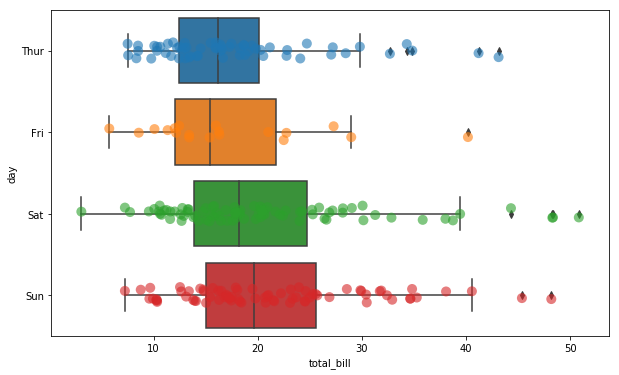

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Get sample data
tips = sns.load_dataset("tips")

# Make figure and axis with dimension 10x6 inches
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot
sns.boxplot(x="total_bill", y="day", data=tips, ax=ax, orient='h')

# Add strip/jitter plot with transparent data circles
sns.stripplot(x="total_bill", y="day", data=tips,
              size=10, jitter=True, edgecolor="gray", alpha=0.6)

# Display the output
plt.show()

From above, we can see that there is an aesthetics problem.  The intensity or transparency of the foreground or face color of the box plot is too similar to our jittered data points.  Usually, there is an ```alpha``` option to control transparency level, but did not find one for the ```boxplot``` function.  After some Google searches, I unfortunately discovered that ```seaborn``` does not support this per this Github [issue](https://github.com/mwaskom/seaborn/issues/979) which has a workaround at least.

**Applying the workaround and adding some finishing touches:**

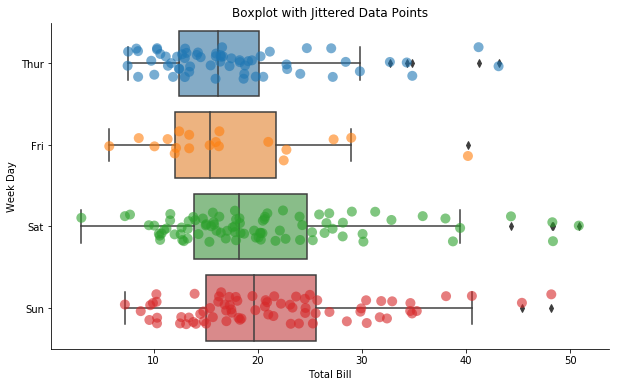

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Get sample data
tips = sns.load_dataset("tips")

# Make figure and axis with dimension 10x6 inches
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot and make the facecolor more transparent
sns.boxplot(x="total_bill", y="day", data=tips, ax=ax, orient='h')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.6))

# Add strip/jitter plot with semi-transparent data circles
sns.stripplot(x="total_bill", y="day", data=tips,
              size=10, jitter=0.2, edgecolor="gray", alpha=0.6)

# Remove top and right axis
sns.despine()

# Override the x and y axis labels and add title
ax.set(title='Boxplot with Jittered Data Points', xlabel='Total Bill', ylabel='Week Day')

# Display the output
plt.show()

With the jittered data points, we can tell right away that there were fewer observations from Friday's data.